In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
#將圖片數字標準化，直接除以255，讓每個數字可介於0~1之間
x_train, x_test = x_train / 255.0, x_test / 255.0

#60000 張圖片的資料集，每一張 32 x 32大小，10種分類

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5279 - accuracy: 0.4453 - val_loss: 1.2793 - val_accuracy: 0.5395
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1361 - accuracy: 0.6018 - val_loss: 1.0554 - val_accuracy: 0.6240
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9840 - accuracy: 0.6568 - val_loss: 0.9731 - val_accuracy: 0.6576
Epoch 4/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.8829 - accuracy: 0.6918 - val_loss: 0.9393 - val_accuracy: 0.6726
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8102 - accuracy: 0.7149 - val_loss: 0.8648 - val_accuracy: 0.6950
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7503 - accuracy: 0.7359 - val_loss: 0.8855 - val_accuracy: 0.6971
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7046 - accuracy: 0.7521 - val_loss: 0.9140 - val_accuracy:

313/313 - 1s - loss: 0.8750 - accuracy: 0.7089


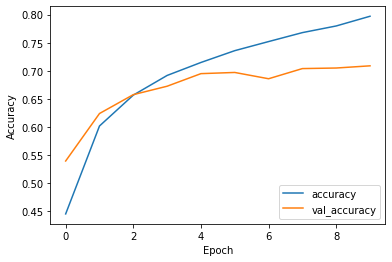

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [ ]:
#total_params = (filter_height * filter_width * input_image_channels + 1) * number_of_filters
#total_params = (3*3*3+1) * 32 = 896
#total_params = (3*3*32+1) * 64 = 18496